100%|██████████| 23.5M/23.5M [00:01<00:00, 12.8MB/s]


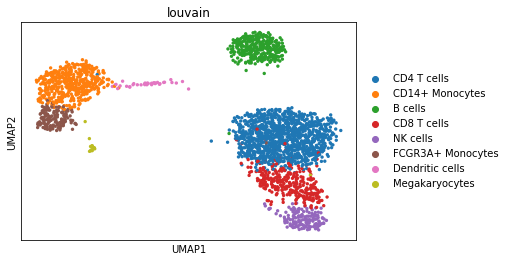

In [2]:
import scanpy as sc
import decoupler as dc

import pandas as pd

adata = sc.datasets.pbmc3k_processed().raw.to_adata()
sc.pl.umap(adata, color='louvain')


In [3]:
marker_genes = [
['IL7R', 'CD4 T cells'],
['LDH8', 'CD4 T cells'],
['CD14', 'CD14+ Monocytes'],
['LYZ', 'CD14+ Monocytes'],
['MS4A1', 'B cells'],
['HLA-DRA', 'B cells'],
['CD8A', 'CD8 T cells'],
['CCL5', 'CD8 T cells'],
['GNLY', 'NK cells'],
['NKG7', 'NK cells'],
['FCGR3A', 'FCGR3A+ Monocytes'],
['MS4A7', 'FCGR3A+ Monocytes'],
['FCER1A', 'Dendritic Cells'],
['CST3', 'Dendritic Cells'],
['PPBP', 'Megakaryocytes'],
['PF4', 'Megakaryocytes']
]
marker_genes = pd.DataFrame(marker_genes, columns=['gene', 'cell_type']) 
marker_genes['weight'] = 1
marker_genes

,gene,cell_type,weight
0,IL7R,CD4 T cells,1
1,LDH8,CD4 T cells,1
2,CD14,CD14+ Monocytes,1
3,LYZ,CD14+ Monocytes,1
4,MS4A1,B cells,1
5,HLA-DRA,B cells,1
6,CD8A,CD8 T cells,1
7,CCL5,CD8 T cells,1
8,GNLY,NK cells,1
9,NKG7,NK cells,1


In [4]:
dc.run_ora(adata, marker_genes, min_n=0, source='cell_type', target='gene', weight='weight')


In [13]:
adata
# adata.obsm["ora_pvals"]
adata.obsm["ora_estimate"]


,B cells,CD14+ Monocytes,CD4 T cells,CD8 T cells,Dendritic Cells,FCGR3A+ Monocytes,Megakaryocytes,NK cells
AAACATACAACCAC-1,2.334632e-11,1.171178e+00,1.171178e+00,2.930024e+00,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11
AAACATTGAGCTAC-1,2.930024e+00,1.171178e+00,1.171178e+00,2.334632e-11,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11
AAACATTGATCAGC-1,2.334632e-11,1.171178e+00,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11,1.171178e+00
AAACCGTGCTTCCG-1,1.171178e+00,1.171178e+00,2.334632e-11,2.334632e-11,1.171178e+00,2.930024e+00,1.171178e+00,1.171178e+00
AAACCGTGTATGCG-1,1.171178e+00,2.334632e-11,2.334632e-11,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11,2.930024e+00
...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1.171178e+00,2.930024e+00,2.334632e-11,2.334632e-11,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11
TTTCTACTGAGGCA-1,1.171178e+00,2.334632e-11,1.171178e+00,2.334632e-11,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11
TTTCTACTTCCTCG-1,2.930024e+00,2.334632e-11,1.171178e+00,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11
TTTGCATGAGAGGC-1,2.930024e+00,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11,2.334632e-11


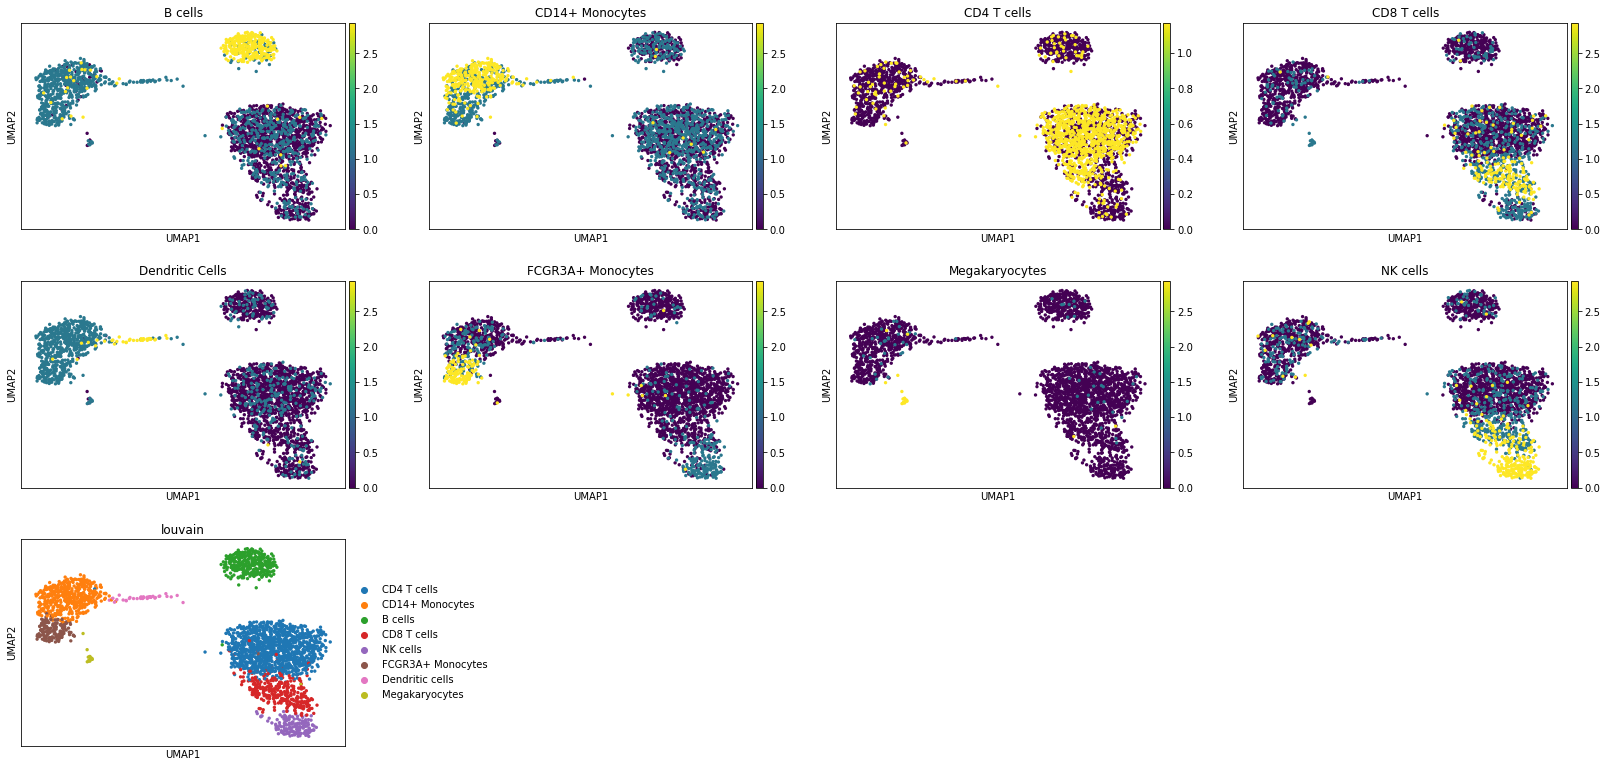

In [14]:
tmp = dc.get_acts(adata, obsm_key='ora_estimate')
sc.pl.umap(tmp, color=list(tmp.var.index)+['louvain'])